In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('sample abnormal temp table.csv')

In [9]:
df.head()

,timestamp,temp,max,min,alert
0,23/4/2021 0800,10,10,3,True
1,23/4/2021 0815,11,11,3,True
2,23/4/2021 0830,12,12,3,True
3,23/4/2021 0845,13,13,3,True
4,23/4/2021 0900,14,14,3,True


In [10]:
df.tail()

,timestamp,temp,max,min,alert
8,23/4/2021 1000,11,18,3,True
9,23/4/2021 1015,10,18,3,True
10,23/4/2021 1030,9,18,3,True
11,23/4/2021 1045,9,18,3,True
12,23/4/2021 1100,9,18,3,True


### Max Min Temperature Breach

In [15]:
# Check whether max temp or min temp has been breached

max_breached = False
min_breached = False

max_recorded = df['max'].max()
min_recorded = df['min'].min()

if max_recorded > 8: max_breached = True
if min_recorded < 2: min_breached = True

if max_breached:
    print('Maximum temperature limited of 8 degrees has been breached')
    print('Maximum temperature recorded is',max_recorded)
else:
    print('Minimum temperature limited of 2 degrees has been breached')
    print('Minimum temperature recorded is',min_recorded)

Maximum temperature limited of 8 degrees has been breached
Maximum temperature recorded is 18


### Tabulation & Visualisation

In [12]:
df1 = df.groupby('temp').agg({'timestamp':'count'})

In [17]:
df1['time exposed (mins)'] = df1['timestamp']*15

In [21]:
df1

,timestamp,time exposed (mins)
temp,,
9,3,45
10,2,30
11,2,30
12,1,15
13,2,30
14,1,15
15,2,30


In [27]:
df1['time exposed (mins)']

temp
9     45
10    30
11    30
12    15
13    30
14    15
15    30
Name: time exposed (mins), dtype: int64

In [25]:
df1.iloc[:,[1]]

,time exposed (mins)
temp,
9,45
10,30
11,30
12,15
13,30
14,15
15,30


<AxesSubplot:xlabel='temp', ylabel='time exposed (mins)'>

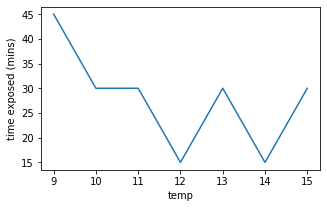

In [36]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=df1, x='temp',y='time exposed (mins)')